In [2]:
import numpy as np
import json 
import argparse
import ast
import sys 
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation 
from IPython import display
from IPython.display import clear_output
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [3]:
import IPython
ADJUST = lambda x, y: (x[0]-y, x[1]-y)

class Renderer():
    def __init__(self, filename, t):
        with open(filename) as f:
            self.game_data = json.load(f)
        self.size = self.game_data['size']
        self.pad_width = self.game_data['pad_width']
        self.units = self.game_data['units']
        self.record = self.game_data['ep_record']
        self.t = t
        #self.info = info

    def replay(self):
        if self.t:
            for _step in self.record.keys():
                pred_pos = self.record[_step]["pred_pos"]
                pred_pos = ast.literal_eval(pred_pos)
                prey_pos = self.record[_step]["prey_pos"]
                prey_pos = ast.literal_eval(prey_pos)
                #print(f"ACTIONS: {self.record[_step]['actions']}")
                #print(f"REWARDS: {self.record[_step]['rewards']}")
                #print(f"STEPS: {_step}")
                if _step == '0':
                    self.render_terminal(pred_pos, prey_pos)
                    #key = input("Press Enter to START")
                    self.clear_lines((self.size+12))
                else:
                    self.render_terminal(pred_pos, prey_pos)
                    #key = input("press Enter to continue or \"e\" to exit")
                    self.clear_lines((self.size+12))
                #if key == "e":
                 #   sys.exit()
                
                if _step == "20":
                    break

    def render_terminal(self, predator_pos, prey_pos):
         adjust = lambda x, y: (x[0]-y, x[1]-y)
         gmap = np.zeros((self.size, self.size), dtype=np.int32).tolist()
         for _id, position in predator_pos.items():
             (x, y) = adjust(position, self.pad_width)
             print(f"{_id}: {(x, y)}")
             gmap[x][y]  = f"T{_id[-1]}"
         for _id, position in prey_pos.items():
             if position == (0,0):
                 continue
             (x, y) = adjust(position, self.pad_width)
             print(f"{_id}: {(x, y)}")
             gmap[x][y]  = f"D{_id[-1]}"

         gmap = [list(map(lambda x: "." if x == 0 else x, l)) for l in gmap]
         print(np.matrix(gmap))

    def clear_lines(self, lines=15):
        LINE_UP = '\033[1A'
        LINE_CLEAR = '\x1b[2k'
        IPython.display.clear_output(wait=True)
        for i in range(lines):
            print(LINE_CLEAR, end=LINE_UP)
        
    def render_plot(self):
        return self.record
        for _step in self.record.keys():
                pred_pos = self.record[_step]["pred_pos"]
                pred_pos = ast.literal_eval(pred_pos)
                prey_pos = self.record[_step]["prey_pos"]
                prey_pos = ast.literal_eval(prey_pos)
                print(f"ACTIONS: {self.record[_step]['actions']}")
                print(f"REWARDS: {self.record[_step]['rewards']}")
                print(f"STEPS: {_step}")
        pass

In [30]:
filename = f"../experiments/7/results/15if-4ac-10(d3)-1099-118"
renderer = Renderer(filename, 0.1)
renderer.replay()

In [31]:
replay_dict = renderer.record

for step_ in replay_dict.keys():
    if step_ == '0':
        print(step_)
        pred_pos = replay_dict[step_]["pred_pos"]
        pred_pos = ast.literal_eval(pred_pos)
        prey_pos = replay_dict[step_]["prey_pos"]
        prey_pos = ast.literal_eval(prey_pos)
        print(pred_pos)
        print(prey_pos)
        renderer.render_terminal(pred_pos, prey_pos)


0
{'predator_0': (17, 18), 'predator_1': (16, 5), 'predator_2': (13, 18), 'predator_3': (8, 4)}
{'prey_0': (14, 7), 'prey_1': (5, 15), 'prey_2': (12, 7), 'prey_3': (7, 16), 'prey_4': (7, 12), 'prey_5': (7, 13), 'prey_6': (4, 5), 'prey_7': (7, 5), 'prey_8': (16, 10), 'prey_9': (14, 9)}
predator_0: (13, 14)
predator_1: (12, 1)
predator_2: (9, 14)
predator_3: (4, 0)
prey_0: (10, 3)
prey_1: (1, 11)
prey_2: (8, 3)
prey_3: (3, 12)
prey_4: (3, 8)
prey_5: (3, 9)
prey_6: (0, 1)
prey_7: (3, 1)
prey_8: (12, 6)
prey_9: (10, 5)
[['.' 'D6' '.' '.' '.' '.' '.' '.' '.' '.' '.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.' '.' '.' '.' '.' '.' '.' 'D1' '.' '.' '.']
 ['.' '.' '.' '.' '.' '.' '.' '.' '.' '.' '.' '.' '.' '.' '.']
 ['.' 'D7' '.' '.' '.' '.' '.' '.' 'D4' 'D5' '.' '.' 'D3' '.' '.']
 ['T3' '.' '.' '.' '.' '.' '.' '.' '.' '.' '.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.' '.' '.' '.' '.' '.' '.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.' '.' '.' '.' '.' '.' '.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.' '.' '.' '

In [ ]:
# Create a Figure and axis.
fig , ax = plt.subplots()
# Set limtis of the axis
size = renderer.size
pad_width = renderer.pad_width
# Set the Axis and all the labesl on the axis.
ax.set_xlim(0, size)
ax.set_ylim(size,0)
ax.set_xticks(range(0,size))
ax.set_yticks(range(0,size))
# Create a grid on the minor girds.
ax.grid(alpha=0.2)
ax.set_title("Predator-Prey Environment")
X , Y = np.meshgrid(range(0, size), range(0, size))
ax.scatter(X+0.5, Y+0.5, color="black", alpha=0.1, s=4)
sc_pred = ax.scatter([], [], label="Predator", color='red', edgecolors='k')
sc_prey= ax.scatter([], [], label="Prey", color="green", edgecolors='k')

def animate(i):
    _step = str(i)
    pred_pos = renderer.record[_step]["pred_pos"]
    pred_pos = ast.literal_eval(pred_pos)
    prey_pos = renderer.record[_step]["prey_pos"]
    prey_pos = ast.literal_eval(prey_pos)
    pos_x = []
    pos_y = []
    for k, v in pred_pos.items():
        v = ADJUST(v, pad_width)
        pos_x.append(v[1]+0.5)
        pos_y.append(v[0]+0.5)
    sc_pred.set_offsets([pos_x, pos_y])

    pos_x = []
    pos_y = []
    for k, v in prey_pos.items():
        v = ADJUST(v, pad_width)
        pos_x.append(v[1]+0.5)
        pos_y.append(v[0]+0.5)
    sc_prey.set_offsets([pos_x, pos_y])

steps = len(renderer.record) + 1
anim = FuncAnimation(fig , animate, frames=10, interval=500)
anim.save('./test.gif', writer='imagemagick')

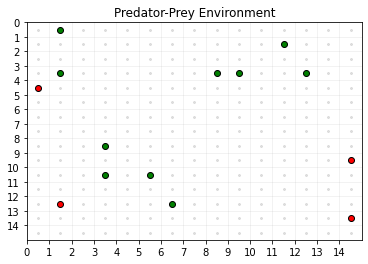

In [32]:
# Plotting function 1 Complete.
# Create a Figure and axis.
fig , ax = plt.subplots()
# Set limtis of the axis
size = renderer.size
pad_width = renderer.pad_width
# Set the Axis and all the labesl on the axis.
ax.set_xlim(0, size)
ax.set_ylim(size,0)
ax.set_xticks(range(0,size))
ax.set_yticks(range(0,size))
# Create a grid on the minor girds.
ax.grid(alpha=0.2)
ax.set_title("Predator-Prey Environment")
X , Y = np.meshgrid(range(0, size), range(0, size))
ax.scatter(X+0.5, Y+0.5, color="black", alpha=0.1, s=4)
sc_pred = ax.scatter([], [], label="Predator", color='red', edgecolors='k')
sc_prey= ax.scatter([], [], label="Prey", color="green", edgecolors='k')
num_agents = renderer.units
l_points = []
lines = []
for i in range(num_agents):
    lobj , = ax.plot([], [], lw=1)
    lines.append(lobj)
    l_points.append([0,0])

def get_last_points(i):
    if i == 0:
        _step = '0'
    else:
        _step = str(i-1)
    last_points = []
    pred_pos = renderer.record[_step]["pred_pos"]
    pred_pos = ast.literal_eval(pred_pos)
    prey_pos = renderer.record[_step]["prey_pos"]
    prey_pos = ast.literal_eval(prey_pos)
    for k, v in pred_pos.items():
        v = ADJUST(v, pad_width)
        xcoord = v[1]+0.5
        ycoord = v[0]+0.5
        last_points.append((ycoord, xcoord))
    for k, v in prey_pos.items():
        v = ADJUST(v, pad_width)
        xcoord = v[1]+0.5
        ycoord = v[0]+0.5
        last_points.append((ycoord, xcoord))
    return last_points


def animate(i):
    _step = str(i)
    last_points = get_last_points(i)
    i = 0
    pred_pos = renderer.record[_step]["pred_pos"]
    pred_pos = ast.literal_eval(pred_pos)
    prey_pos = renderer.record[_step]["prey_pos"]
    prey_pos = ast.literal_eval(prey_pos)
    pos_x = []
    pos_y = []
    pred_point = []
    for k, v in pred_pos.items():
        v = ADJUST(v, pad_width)
        xcoord = v[1]+0.5
        ycoord = v[0]+0.5
        last_x = last_points[i][1]
        last_y = last_points[i][0]
        pos_x.append(xcoord)
        pos_y.append(ycoord)
        lines[i].set_data([last_x, xcoord], [last_y, ycoord])
        lines[i].set_color("red")
        i+=1

    pos_x = np.array(pos_x)
    pos_y = np.array(pos_y)
    data = np.column_stack((pos_x, pos_y))
    sc_pred.set_offsets(data)

    pos_x = []
    pos_y = []
    for k, v in prey_pos.items():
        v = ADJUST(v, pad_width)
        xcoord = v[1]+0.5
        ycoord = v[0]+0.5
        last_x = last_points[i][1]
        last_y = last_points[i][0]
        pos_x.append(xcoord)
        pos_y.append(ycoord)
        #print(f"{(last_x, last_y)} -> {(xcoord, ycoord)}")
        lines[i].set_data([last_x, xcoord], [last_y, ycoord])
        lines[i].set_color("green")
        i+=1
    pos_x = np.array(pos_x)
    pos_y = np.array(pos_y)
    data = np.column_stack((pos_x, pos_y))
    sc_prey.set_offsets(data)
    ax.plot()
    plt.show()
steps = len(renderer.record)
anim = FuncAnimation(fig , animate, frames=steps, interval=500)
anim.save('./test.gif', writer='imagemagick')